# Задание по программированию: Бэггинг и случайный лес

In [42]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
# Загружаем матрицу признаков и ответы digits
X, y = datasets.load_digits(return_X_y=True)

In [19]:
# Посмотрим на размеры матрицы
X.shape

(1797, 64)

In [20]:
# Посмотрим на размеры ответов
y.shape

(1797,)

### Задание 1.
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score

In [21]:
clf = DecisionTreeClassifier(random_state=0)
cvs = cross_val_score(clf, X, y, cv=10)
answer1 = cvs.mean()
answer1

0.8303337234738853

In [22]:
# Запишем 1 ответ в файл
with open('answer1.txt', 'w') as f:
    f.write(str(answer1))

### Задание 2
Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100

In [25]:
clfb = BaggingClassifier(base_estimator=clf, n_estimators=100, random_state=0).fit(X, y)
cvsb = cross_val_score(clfb, X, y, cv=10)
answer2 = cvsb.mean()
answer2

0.9243136920825039

In [26]:
# Запишем 2 ответ в файл
with open('answer2.txt', 'w') as f:
    f.write(str(answer2))

### Задание 3
Изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [34]:
# Получим требуемое количество признаков
d = int(np.sqrt(X.shape[1]))
d

8

In [37]:
clfb_d = BaggingClassifier(base_estimator=clf, n_estimators=100, max_features = d, random_state=0).fit(X, y)
cvsb_d = cross_val_score(clfb_d, X, y, cv=10)
answer3 = cvsb_d.mean()
answer3

0.9365281294303756

In [36]:
# Запишем 3 ответ в файл
with open('answer3.txt', 'w') as f:
    f.write(str(answer3))

### Задание 4
Попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [39]:
clf_sqd = DecisionTreeClassifier(max_features = 'sqrt', random_state=0)
clfb_sqd = BaggingClassifier(base_estimator=clf_sqd, n_estimators=100, random_state=0).fit(X, y)
cvsb_sqd = cross_val_score(clfb_sqd, X, y, cv=10)
answer4 = cvsb_sqd.mean()
answer4

0.9544773623165452

In [40]:
# Запишем 4 ответ в файл
with open('answer4.txt', 'w') as f:
    f.write(str(answer4))

### Задание 5
Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [48]:
# Количество деревьев, количество признаков, ограничение на глубину дерева
# n_estimators
# max_features
# max_depth

est = 100
feat = 'sqrt'
depth = None
rfc = RandomForestClassifier(n_estimators = est, max_features = feat, max_depth = depth, random_state=0)
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
cvs_rfc = cross_val_score(rfc, X, y, cv=10)
cvs_rfc.mean()

0.9506154156838471

*Неожиданно, но оценка качества алгоритма RandomForestClassifier хуже, чем BaggingClassifier с теми же параметрами*

C:\Users\Svetlana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Svetlana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Svetlana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Svetlana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Svetlana\Anaconda3\lib\site-packages\sklearn\ensemble\f

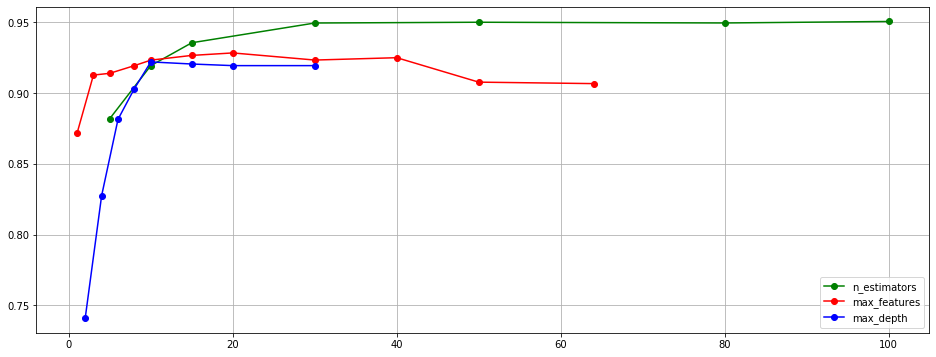

In [54]:
#### Постром графики зависимости RandomForestClassifier при различных параметрах
ests = [5, 10, 15, 30, 50, 80, 100]
feats = [1, 3, 5, 8, 10, 15, 20, 30, 40, 50, X.shape[1]]
depths = [2, 4, 6, 8, 10, 15, 20, 30, None]

pyplot.figure(figsize = (16, 6))

def cvs_est(est):
    rfc = RandomForestClassifier(n_estimators = est, random_state=0)
    rfc.fit(X, y)
    return cross_val_score(rfc, X, y, cv=10).mean()

def cvs_feat(feat):
    rfc = RandomForestClassifier(max_features = feat, random_state=0)
    rfc.fit(X, y)
    return cross_val_score(rfc, X, y, cv=10).mean()

def cvs_depth(depth):
    rfc = RandomForestClassifier(max_depth = depth, random_state=0)
    rfc.fit(X, y)
    return cross_val_score(rfc, X, y, cv=10).mean()


cvs_ests = [cvs_est(est) for est in ests]
cvs_feats = [cvs_feat(feat) for feat in feats]
cvs_depths = [cvs_depth(depth) for depth in depths]

pylab.grid(True)
pylab.plot(ests, cvs_ests, 'g-', marker='o', label='n_estimators')
pylab.plot(feats, cvs_feats, 'r-', marker='o', label='max_features')
pylab.plot(depths, cvs_depths, 'b-', marker='o', label='max_depth')
#pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [59]:
answer5 = [2, 3, 4, 7]
# Запишем 5 ответ в файл
with open('answer5.txt', 'w') as f:
    f.write(' '.join([str(ans) for ans in answer5]))